<a href="https://colab.research.google.com/github/devJos77/eda-theory-da/blob/main/eda_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA THEORY ASSIGNMENT**

**DEVANG JOSHI**

**21BDS0275**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/TravelMode.csv"
col_names = ['rownames', 'individual', 'mode', 'choice', 'wait','vcost','travel','gcost','income','size']
df = pd.read_csv(url, header=None, names=col_names)


In [ ]:
df.head(10)

,rownames,individual,mode,choice,wait,vcost,travel,gcost,income,size
0,rownames,individual,mode,choice,wait,vcost,travel,gcost,income,size
1,1,1,air,no,69,59,100,70,35,1
2,2,1,train,no,34,31,372,71,35,1
3,3,1,bus,no,35,25,417,70,35,1
4,4,1,car,yes,0,10,180,30,35,1
5,5,2,air,no,64,58,68,68,30,2
6,6,2,train,no,44,31,354,84,30,2
7,7,2,bus,no,53,25,399,85,30,2
8,8,2,car,yes,0,11,255,50,30,2
9,9,3,air,no,69,115,125,129,40,1


In [ ]:
df.describe

<bound method NDFrame.describe of      rownames  individual   mode  choice  wait  vcost  travel  gcost  income  \
0    rownames  individual   mode  choice  wait  vcost  travel  gcost  income   
1           1           1    air      no    69     59     100     70      35   
2           2           1  train      no    34     31     372     71      35   
3           3           1    bus      no    35     25     417     70      35   
4           4           1    car     yes     0     10     180     30      35   
..        ...         ...    ...     ...   ...    ...     ...    ...     ...   
836       836         209    car     yes     0     27     510     82      20   
837       837         210    air      no    64     66     140     87      70   
838       838         210  train      no    44     54     670    156      70   
839       839         210    bus      no    53     33     664    134      70   
840       840         210    car     yes     0     12     540     94      70   

     size  
0    size  
1       1  
2       1  
3       1  
4       1  
..    ...  
836     1  
837     4  
838     4  
839     4  
840     4  

[841 rows x 10 columns]>

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rownames    841 non-null    object
 1   individual  841 non-null    object
 2   mode        841 non-null    object
 3   choice      841 non-null    object
 4   wait        841 non-null    object
 5   vcost       841 non-null    object
 6   travel      841 non-null    object
 7   gcost       841 non-null    object
 8   income      841 non-null    object
 9   size        841 non-null    object
dtypes: object(10)
memory usage: 65.8+ KB
None


In [ ]:
# Explore Dimensions
print("Dataset dimensions:", df.shape)

Dataset dimensions: (841, 10)


In [ ]:
# Data Handling and Cleaning
# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
rownames      0
individual    0
mode          0
choice        0
wait          0
vcost         0
travel        0
gcost         0
income        0
size          0
dtype: int64


In [ ]:
# Remove columns with more than 50% missing values
#threshold = len(df) * 0.5
#df = df.dropna(axis=1, thresh=threshold)

In [ ]:
# Fill remaining missing values
df = df.fillna(df.ffill())


In [ ]:
df.head()

,rownames,individual,mode,choice,wait,vcost,travel,gcost,income,size
0,rownames,individual,mode,choice,wait,vcost,travel,gcost,income,size
1,1,1,air,no,69,59,100,70,35,1
2,2,1,train,no,34,31,372,71,35,1
3,3,1,bus,no,35,25,417,70,35,1
4,4,1,car,yes,0,10,180,30,35,1


In [ ]:
# Convert categorical variables to numeric
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = pd.Categorical(df[col]).codes

IndexError: index 2 is out of bounds for axis 0 with size 2

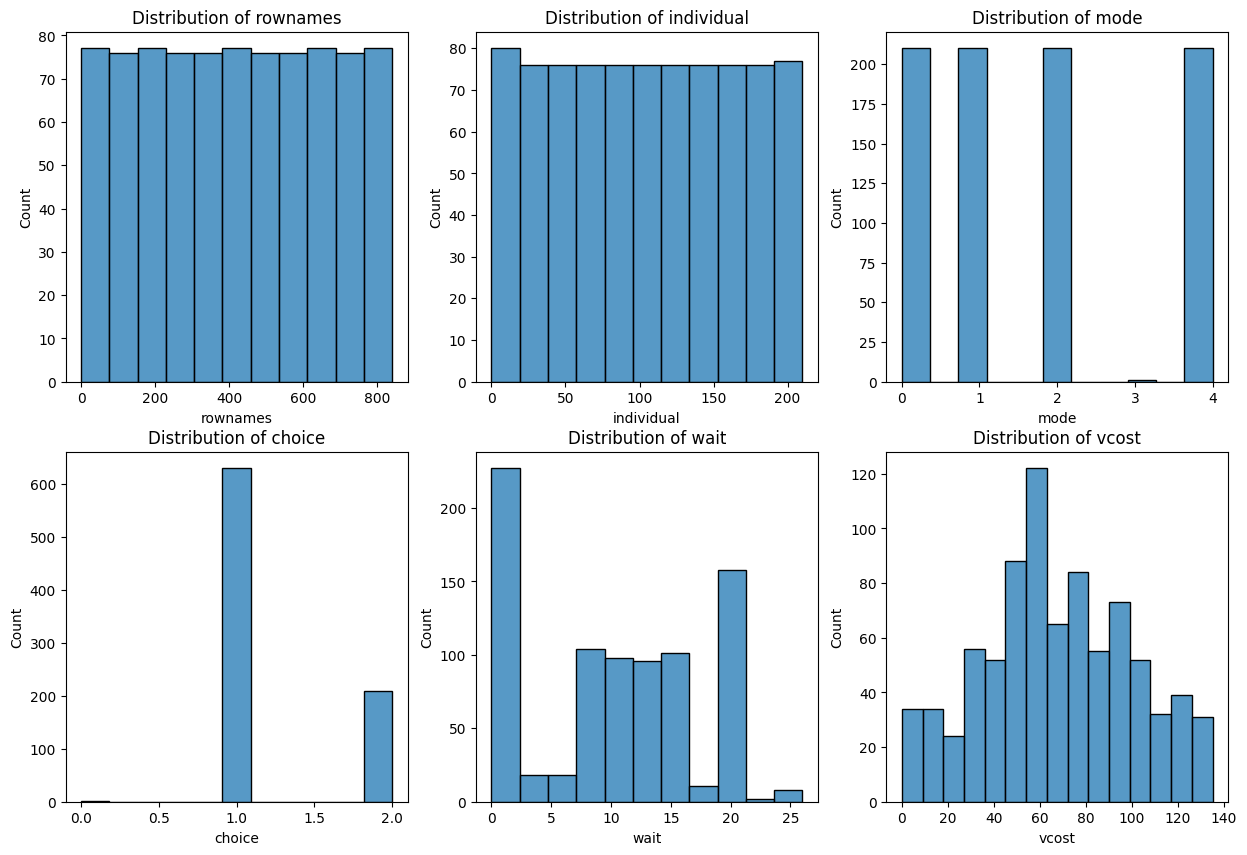

In [ ]:
# Univariate Analysis
# Histograms for numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns  # Limit to first 5 for brevity
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


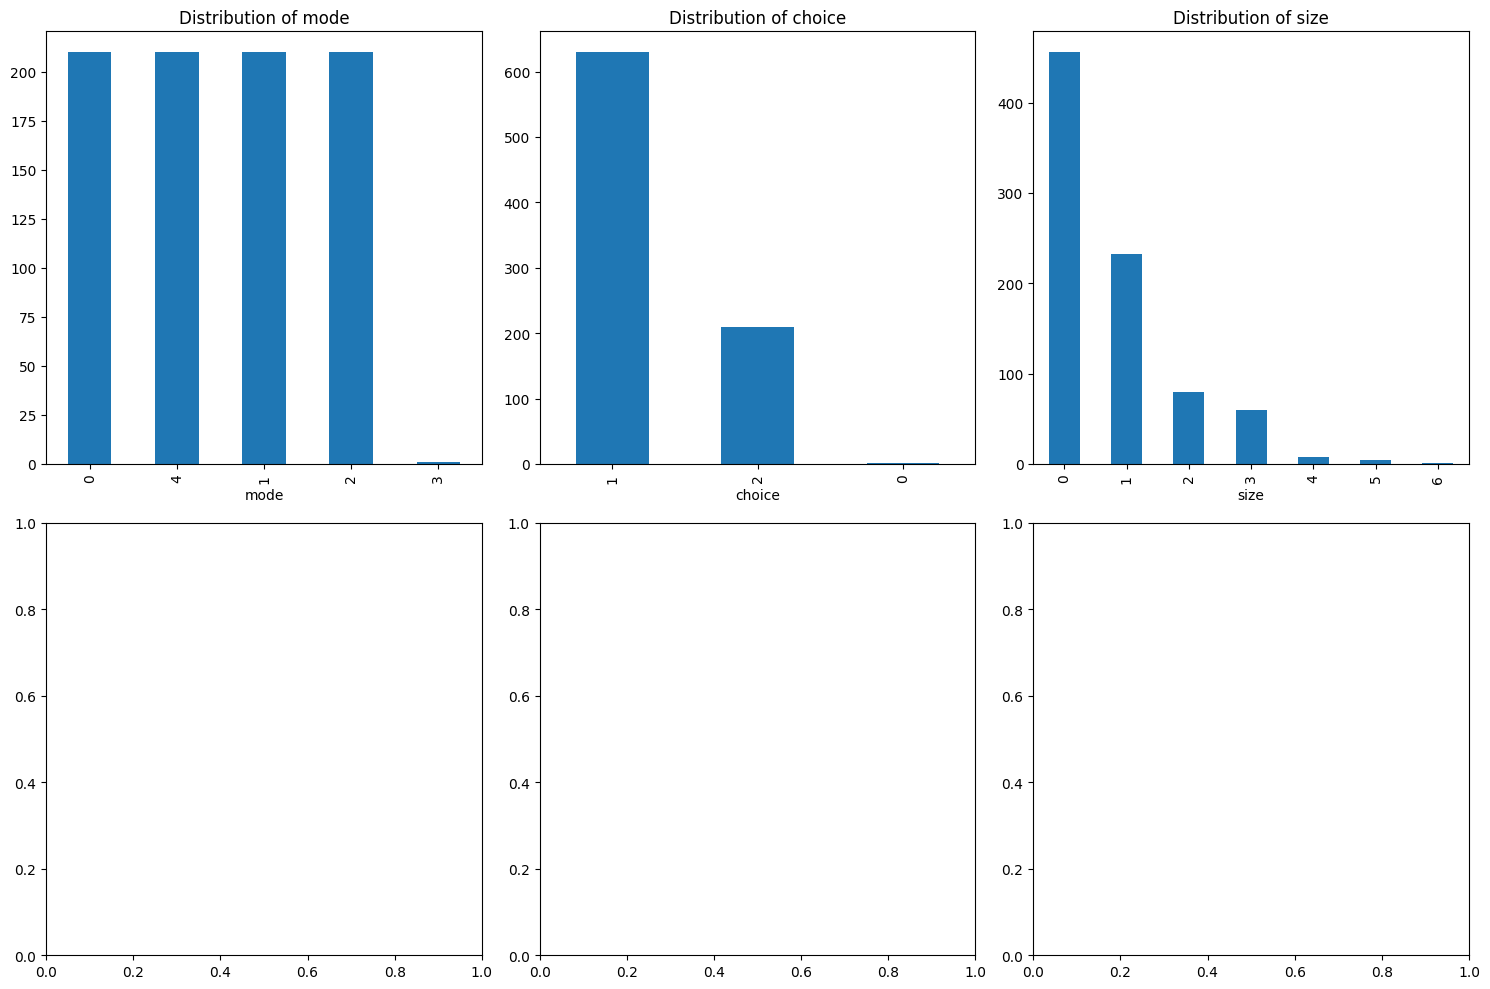

In [ ]:
# Bar plots for categorical variables
#categorical_cols = df.select_dtypes(exclude=[np.number]).columns
#categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

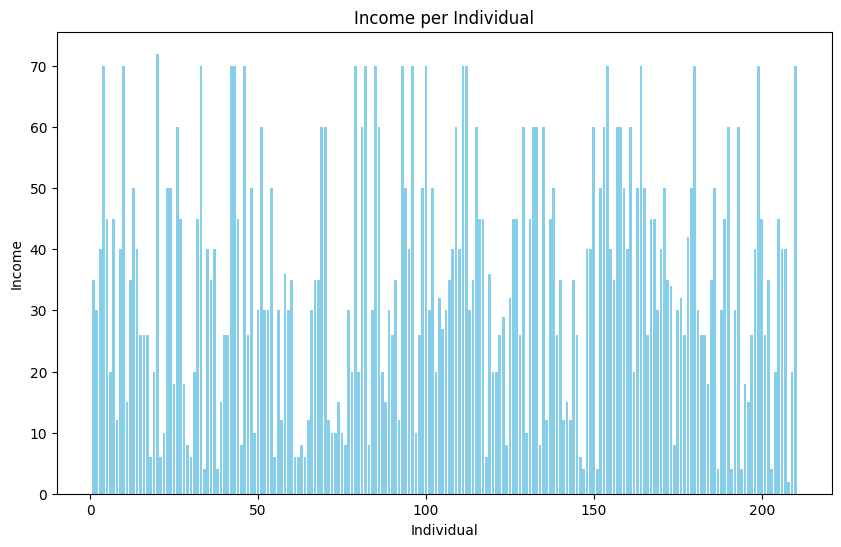

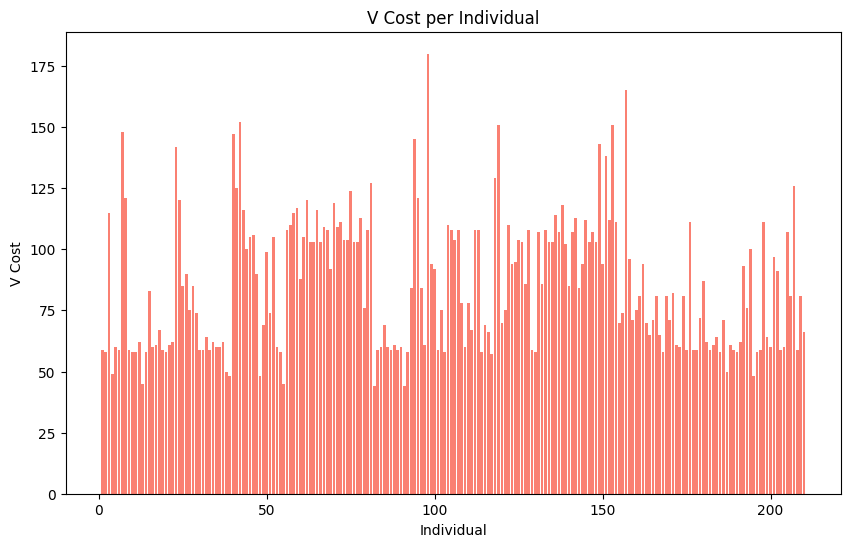

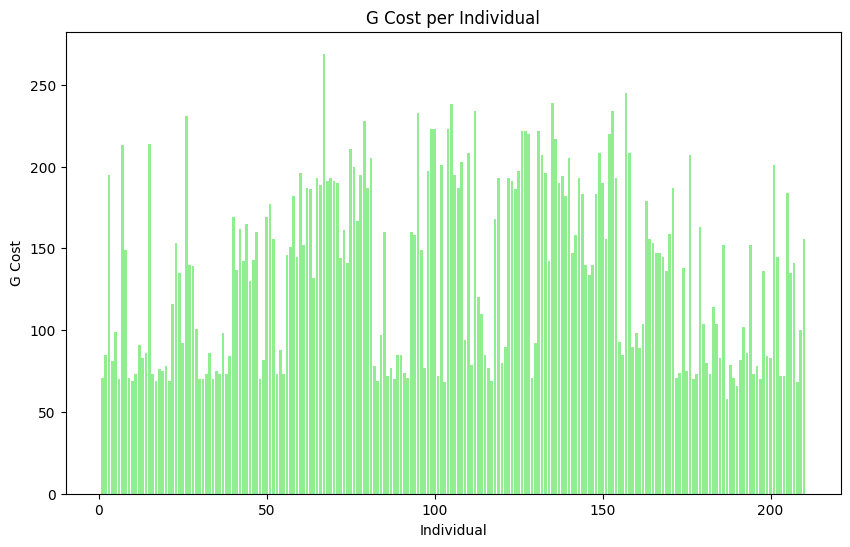

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/TravelMode.csv"
df = pd.read_csv(url)

# Bar plot between 'individual' and 'income'
plt.figure(figsize=(10, 6))
plt.bar(df['individual'], df['income'], color='skyblue')
plt.xlabel('Individual')
plt.ylabel('Income')
plt.title('Income per Individual')
plt.show()

# Bar plot between 'individual' and 'vcost'
plt.figure(figsize=(10, 6))
plt.bar(df['individual'], df['vcost'], color='salmon')
plt.xlabel('Individual')
plt.ylabel('V Cost')
plt.title('V Cost per Individual')
plt.show()

# Bar plot between 'individual' and 'gcost'
plt.figure(figsize=(10, 6))
plt.bar(df['individual'], df['gcost'], color='lightgreen')
plt.xlabel('Individual')
plt.ylabel('G Cost')
plt.title('G Cost per Individual')
plt.show()


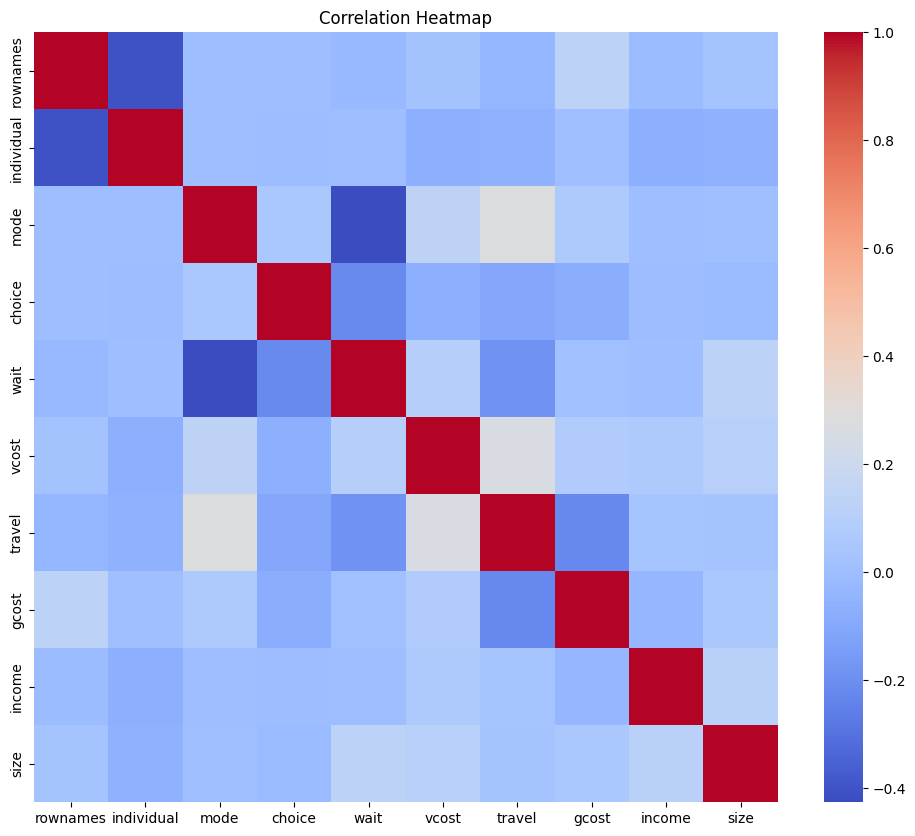

In [ ]:
# Bivariate Analysis
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(categorical_cols)

['mode', 'choice', 'size']


Index(['rownames', 'individual', 'mode', 'choice', 'wait', 'vcost', 'travel',
       'gcost', 'income', 'size'],
      dtype='object')


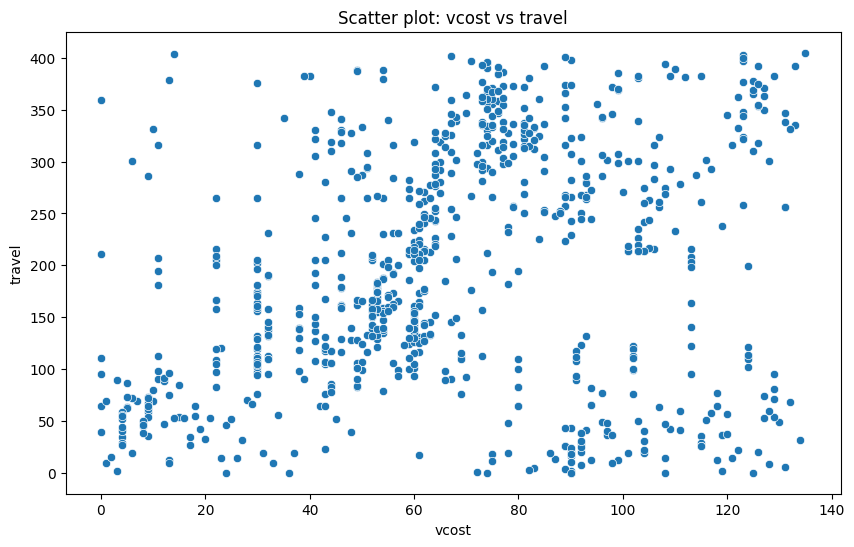

In [ ]:
# Scatter plot for two numerical variables
print(numerical_cols)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[numerical_cols[5]], y=df[numerical_cols[6]])
plt.title(f'Scatter plot: {numerical_cols[5]} vs {numerical_cols[6]}')
plt.show()

<ipython-input-22-df5977287725>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mode', y='income', data=aggregated_df, palette='Blues_d')


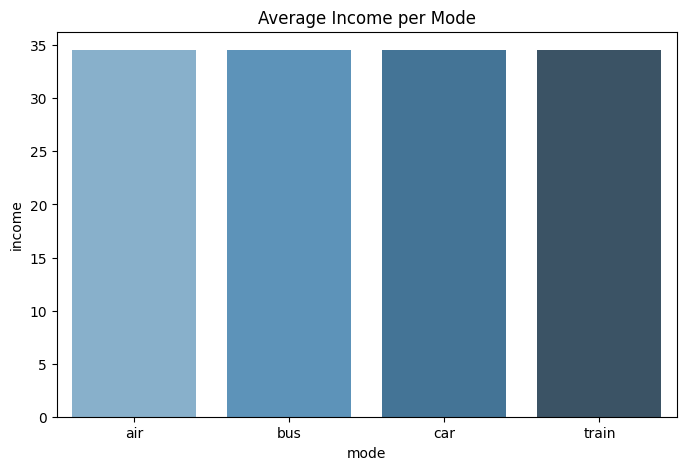

<Figure size 1000x600 with 0 Axes>

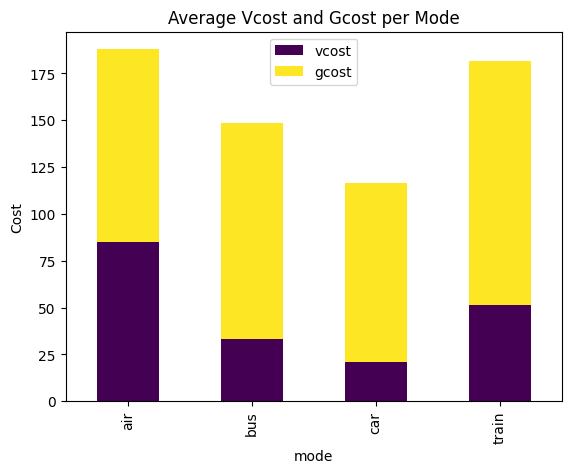

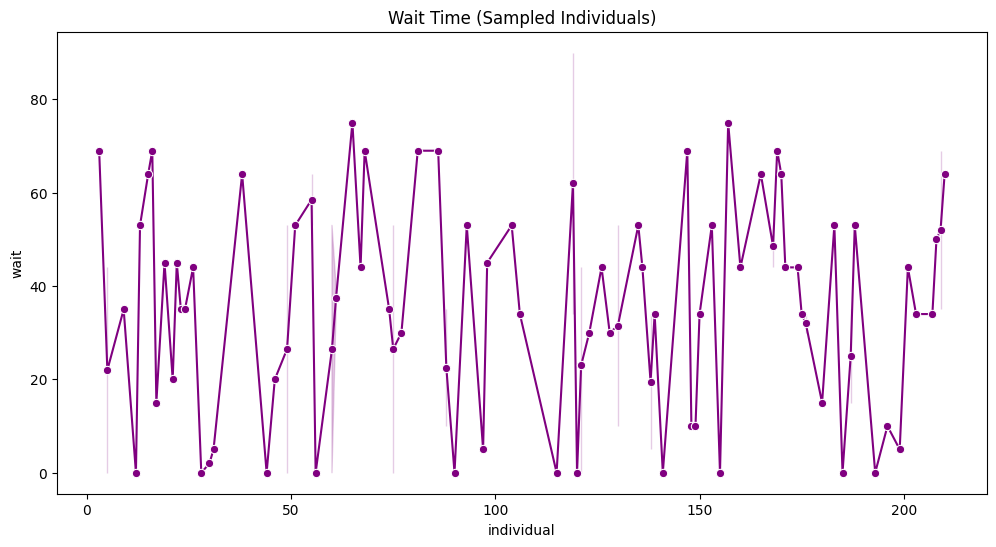

<ipython-input-22-df5977287725>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mode', y='travel', data=df, palette='Set3')


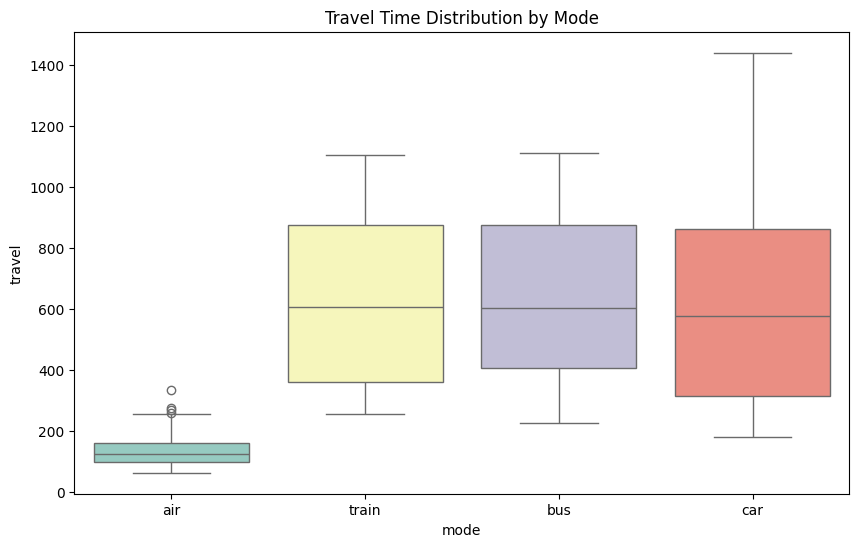

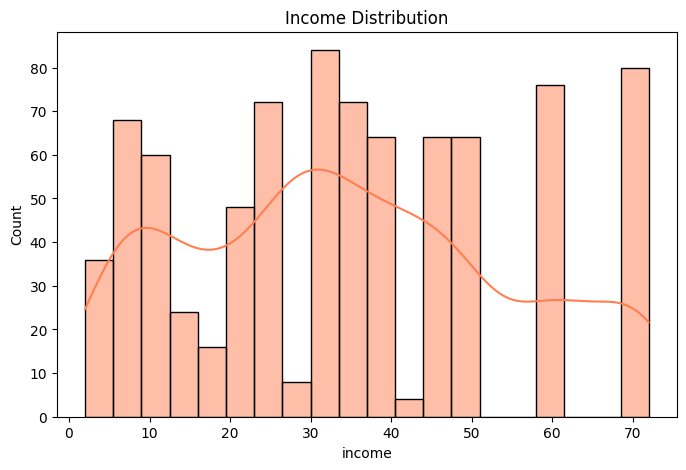

In [ ]:
# Aggregation: Average Income, Vcost, and Gcost per Mode
aggregated_df = df.groupby('mode').agg({'income': 'mean', 'vcost': 'mean', 'gcost': 'mean'}).reset_index()

# Bar Plot: Mode vs Average Income
plt.figure(figsize=(8, 5))
sns.barplot(x='mode', y='income', data=aggregated_df, palette='Blues_d')
plt.title('Average Income per Mode')
plt.show()

# Bar Plot: Mode vs Average Vcost and Gcost
plt.figure(figsize=(10, 6))
aggregated_df[['mode', 'vcost', 'gcost']].set_index('mode').plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Cost')
plt.title('Average Vcost and Gcost per Mode')
plt.show()

# Sampling: Random 100 Individuals for clearer plotting
sampled_df = df.sample(100, random_state=1)

# Line Plot: Sampled Individuals vs Wait Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='individual', y='wait', data=sampled_df, marker='o', color='purple')
plt.title('Wait Time (Sampled Individuals)')
plt.show()

# Box Plot: Travel Time by Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='travel', data=df, palette='Set3')
plt.title('Travel Time Distribution by Mode')
plt.show()

# Histogram: Distribution of Income
plt.figure(figsize=(8, 5))
sns.histplot(df['income'], kde=True, color='coral', bins=20)
plt.title('Income Distribution')
plt.show()

In [ ]:
categorical_cols

['mode', 'choice', 'size']

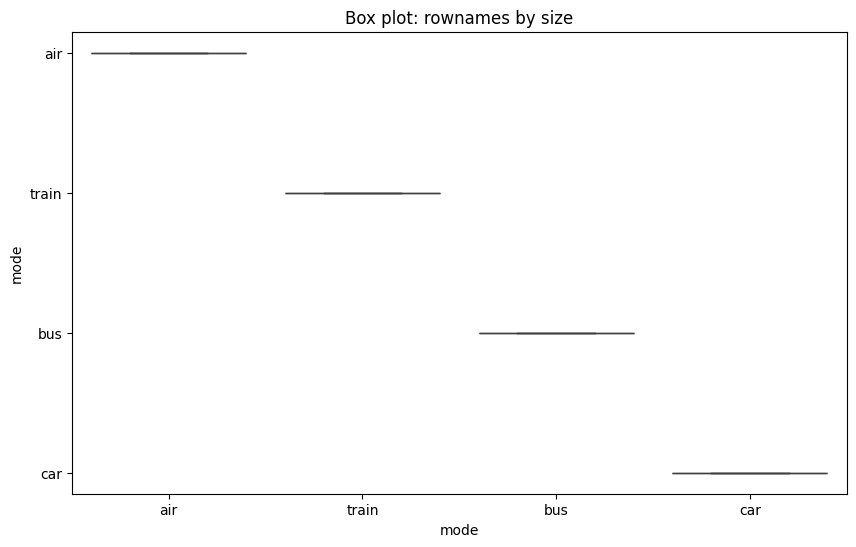

In [ ]:
# Box plot for a numerical variable grouped by a categorical variable
categorical_cols
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
sns.boxplot(x=df[categorical_cols[0]], y=df[numerical_cols[2]])
plt.title(f'Box plot: {numerical_cols[0]} by {categorical_cols[2]}')
plt.show()

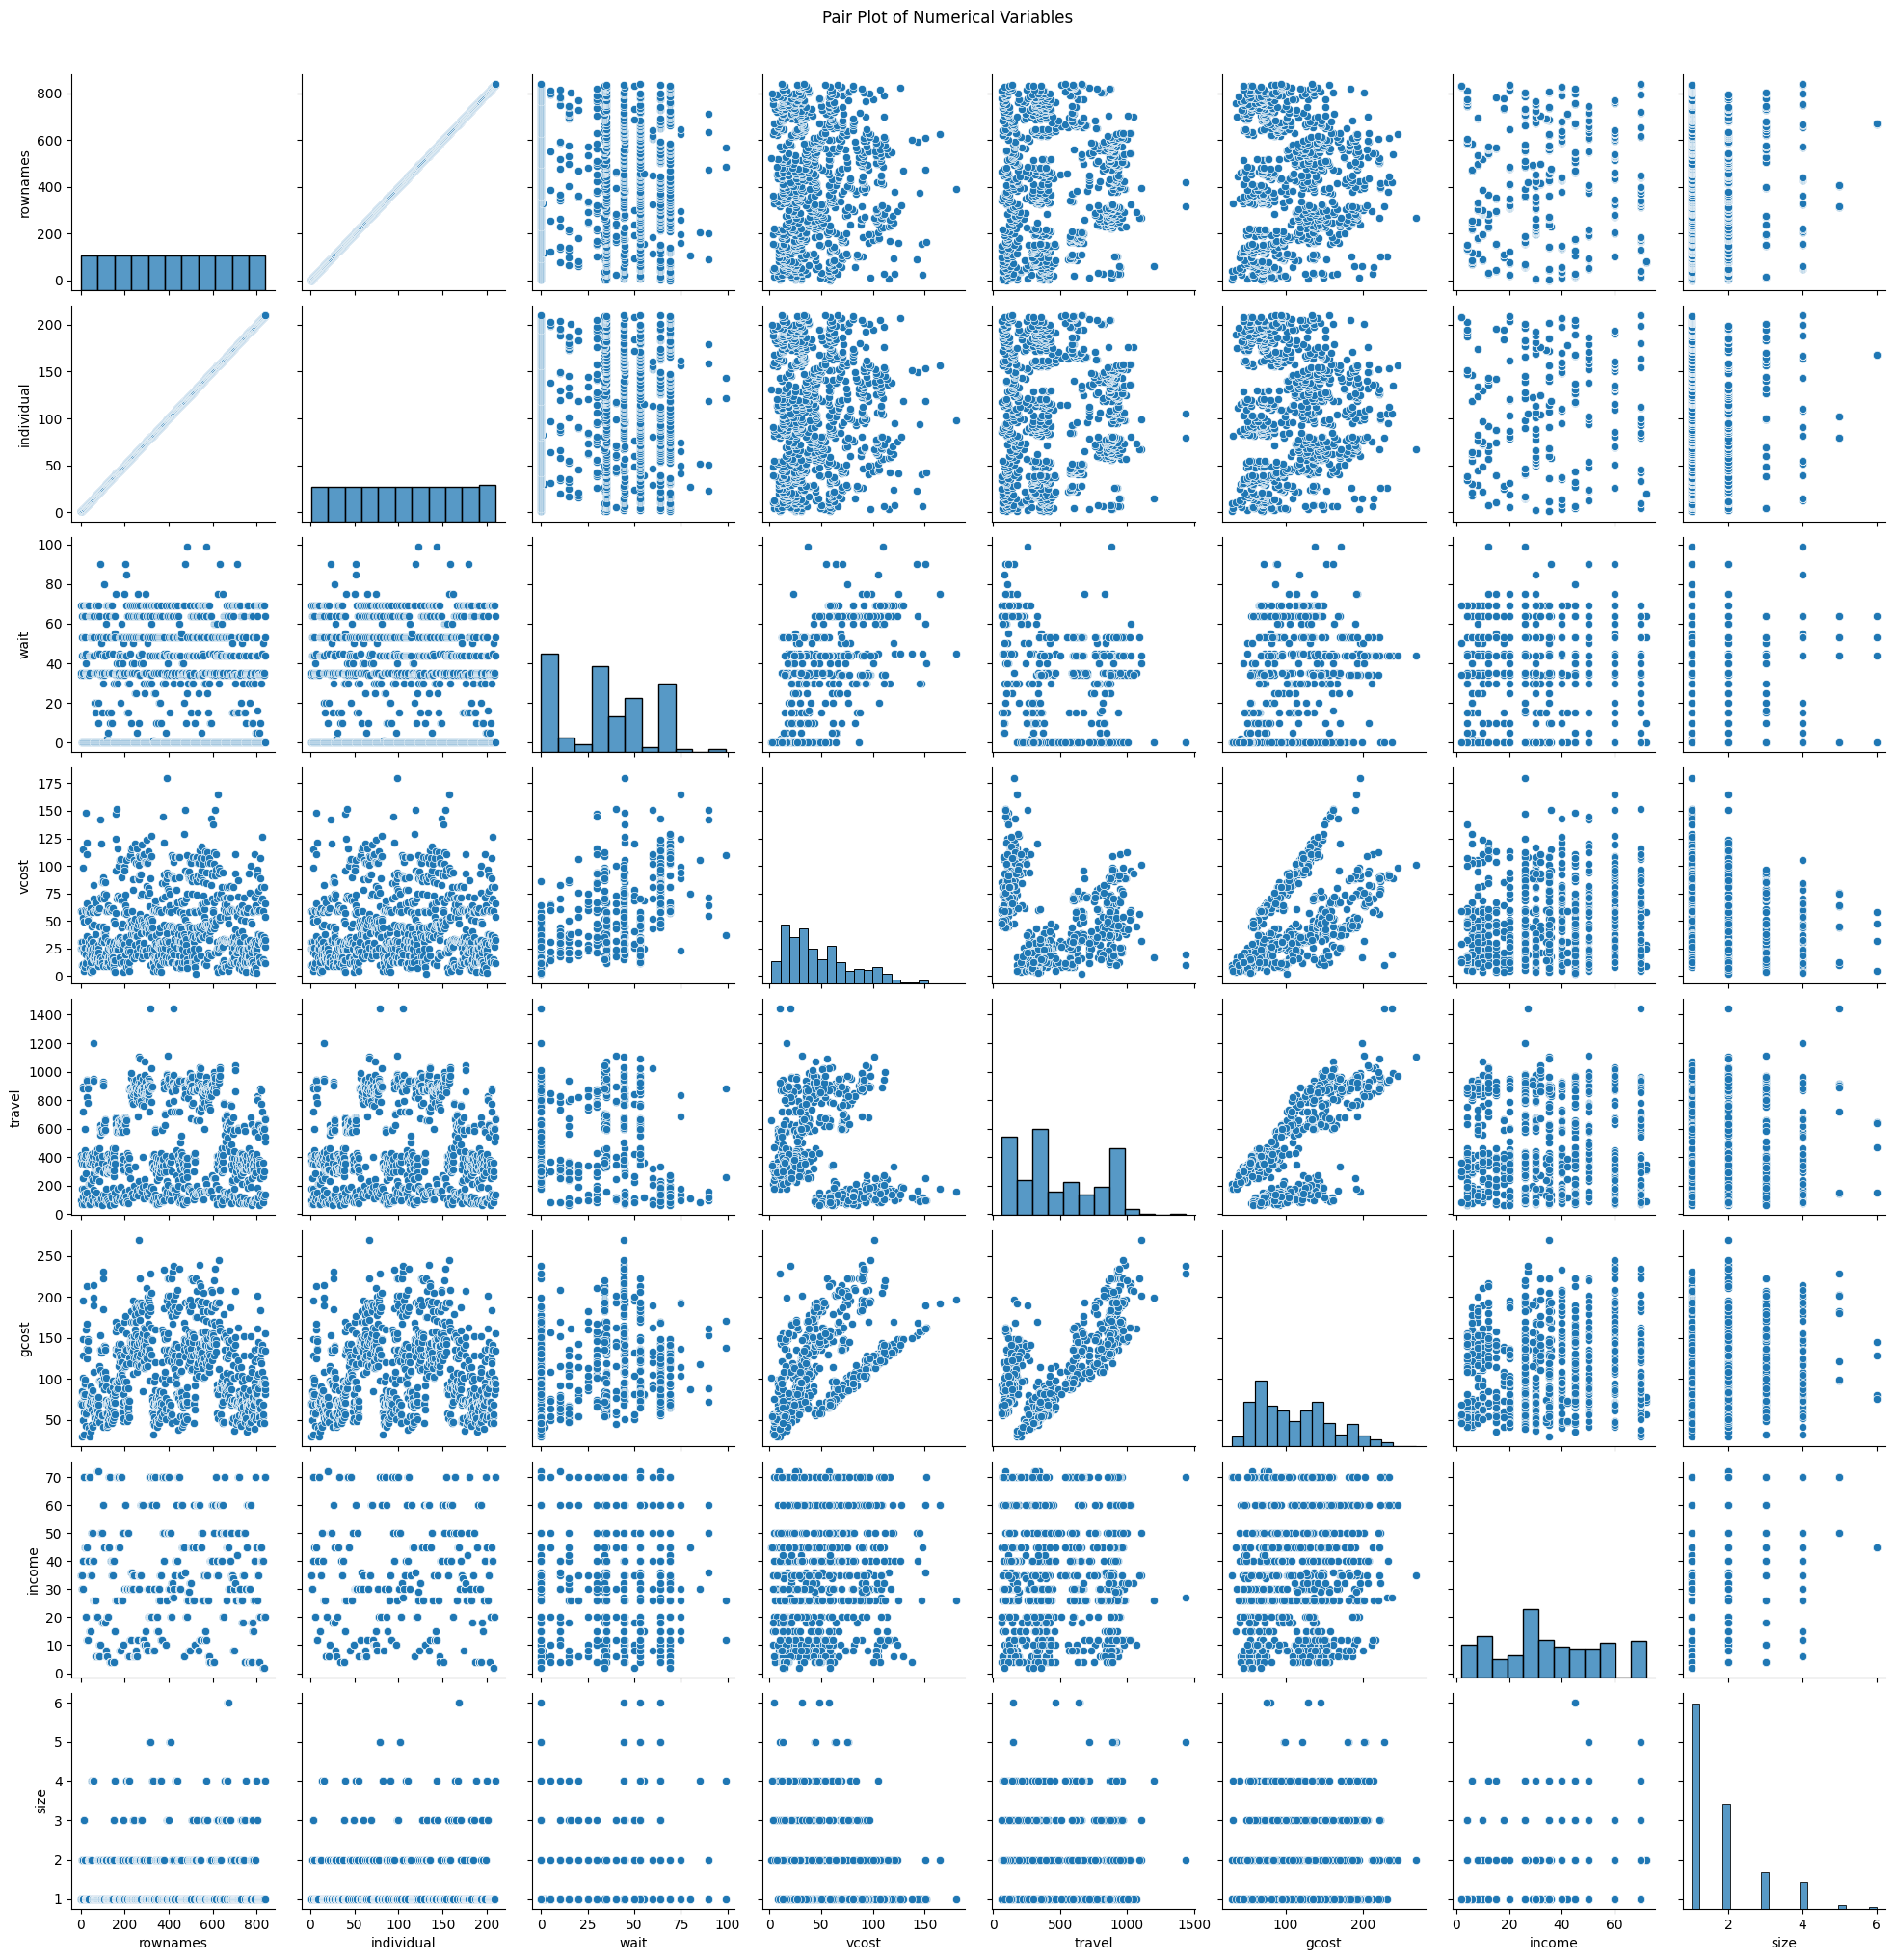

In [ ]:
# Multivariate Analysis
# Pair plot for selected numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


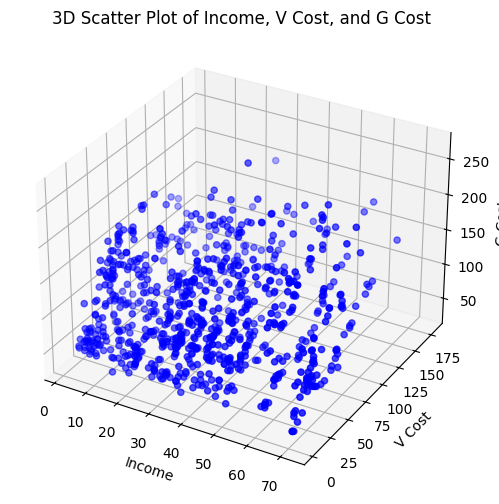

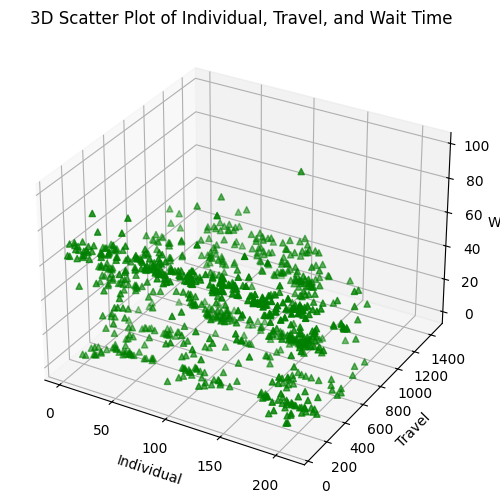

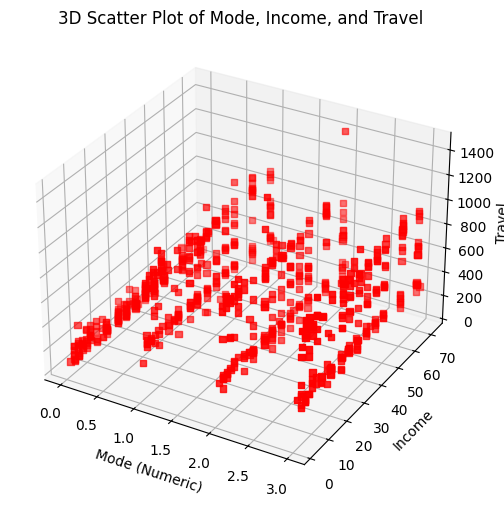

In [ ]:
# 3D Scatter Plot: Income vs Vcost vs Gcost
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['income'], df['vcost'], df['gcost'], c='blue', marker='o')
ax.set_xlabel('Income')
ax.set_ylabel('V Cost')
ax.set_zlabel('G Cost')
plt.title('3D Scatter Plot of Income, V Cost, and G Cost')
plt.show()

# 3D Scatter Plot: Individual vs Travel vs Wait
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['individual'], df['travel'], df['wait'], c='green', marker='^')
ax.set_xlabel('Individual')
ax.set_ylabel('Travel')
ax.set_zlabel('Wait')
plt.title('3D Scatter Plot of Individual, Travel, and Wait Time')
plt.show()

# 3D Scatter Plot: Mode vs Income vs Travel (encoded mode as numbers)
df['mode_numeric'] = df['mode'].astype('category').cat.codes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['mode_numeric'], df['income'], df['travel'], c='red', marker='s')
ax.set_xlabel('Mode (Numeric)')
ax.set_ylabel('Income')
ax.set_zlabel('Travel')
plt.title('3D Scatter Plot of Mode, Income, and Travel')
plt.show()






In [ ]:
anova_income = stats.f_oneway(df[df['mode'] == 'air']['income'],
                              df[df['mode'] == 'train']['income'],
                              df[df['mode'] == 'bus']['income'],
                              df[df['mode'] == 'car']['income'])

anova_vcost = stats.f_oneway(df[df['mode'] == 'air']['vcost'],
                              df[df['mode'] == 'train']['vcost'],
                              df[df['mode'] == 'bus']['vcost'],
                              df[df['mode'] == 'car']['vcost'])

anova_gcost = stats.f_oneway(df[df['mode'] == 'air']['gcost'],
                              df[df['mode'] == 'train']['gcost'],
                              df[df['mode'] == 'bus']['gcost'],
                              df[df['mode'] == 'car']['gcost'])

# Print the results
print(f"Income ANOVA: F-statistic = {anova_income.statistic}, p-value = {anova_income.pvalue}")
print(f"VCost ANOVA: F-statistic = {anova_vcost.statistic}, p-value = {anova_vcost.pvalue}")
print(f"GCost ANOVA: F-statistic = {anova_gcost.statistic}, p-value = {anova_gcost.pvalue}")

# Conclusion based on p-value
alpha = 0.05
for result, col in zip([anova_income, anova_vcost, anova_gcost], ['income', 'vcost', 'gcost']):
    if result.pvalue < alpha:
        print(f"There is a significant difference in {col} based on mode.")
    else:
        print(f"There is no significant difference in {col} based on mode.")


Income ANOVA: F-statistic = 0.0, p-value = 1.0
VCost ANOVA: F-statistic = 352.933274287333, p-value = 4.991328354852525e-148
GCost ANOVA: F-statistic = 22.935927496313408, p-value = 2.8302025486395827e-14
There is no significant difference in income based on mode.
There is a significant difference in vcost based on mode.
There is a significant difference in gcost based on mode.


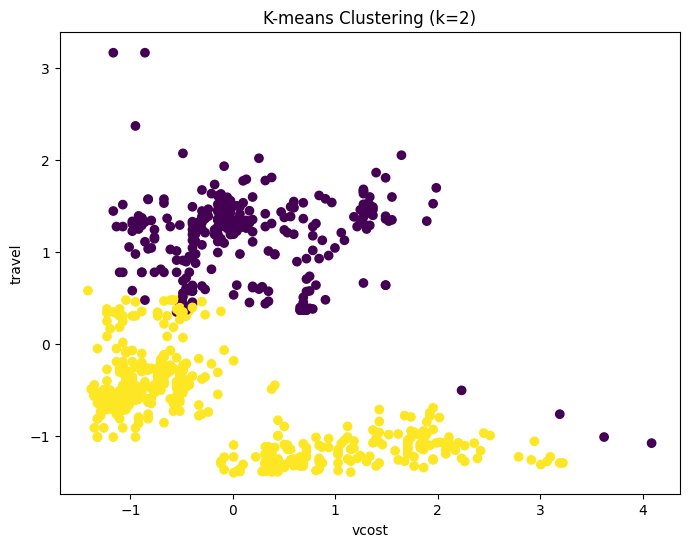

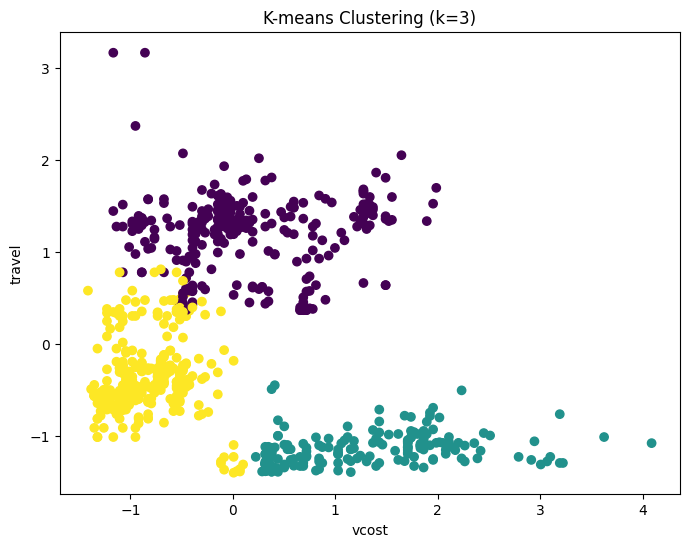

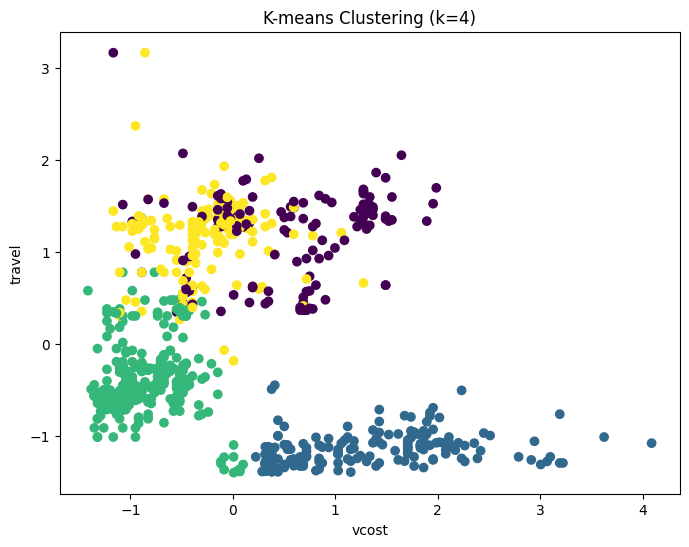

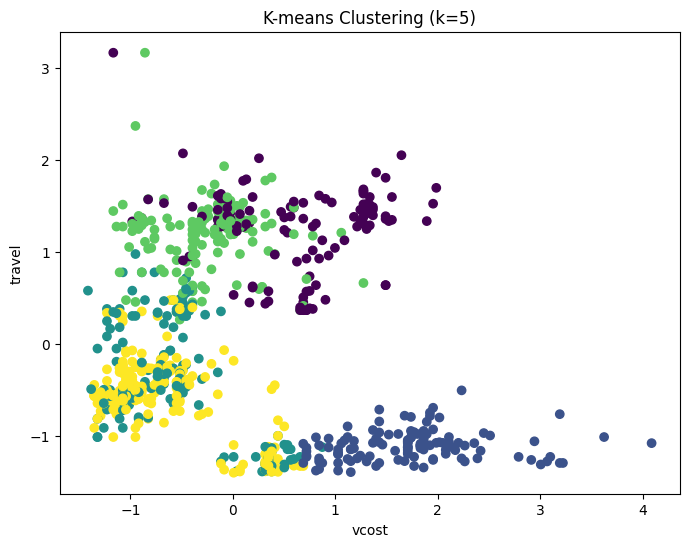

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


# Replace '?' with NaN if any and handle missing values
dataset.replace('?', pd.NA, inplace=True)

# Handle missing values in numeric columns by filling with the mean
numeric_columns = dataset.select_dtypes(include=[float, int])
dataset[numeric_columns.columns] = dataset[numeric_columns.columns].fillna(numeric_columns.mean())

# Handle categorical columns (e.g., 'individual', 'mode', 'choice') by label encoding
categorical_columns = dataset.select_dtypes(include=[object])
encoder = LabelEncoder()

for col in categorical_columns.columns:
    dataset[col] = encoder.fit_transform(dataset[col].astype(str))

# Select numeric columns for clustering
numeric_data = dataset

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)



# Focus on the numeric columns that are most likely relevant for clustering
selected_columns = ['vcost', 'travel', 'gcost', 'income']
numeric_data = dataset[selected_columns]

# Handle missing values in these selected columns
numeric_data = numeric_data.fillna(numeric_data.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform K-means clustering for different values of K
for k in range(2, 6):  # Try different K values (e.g., 2 to 5)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel(selected_columns[0])
    plt.ylabel(selected_columns[1])
    plt.show()


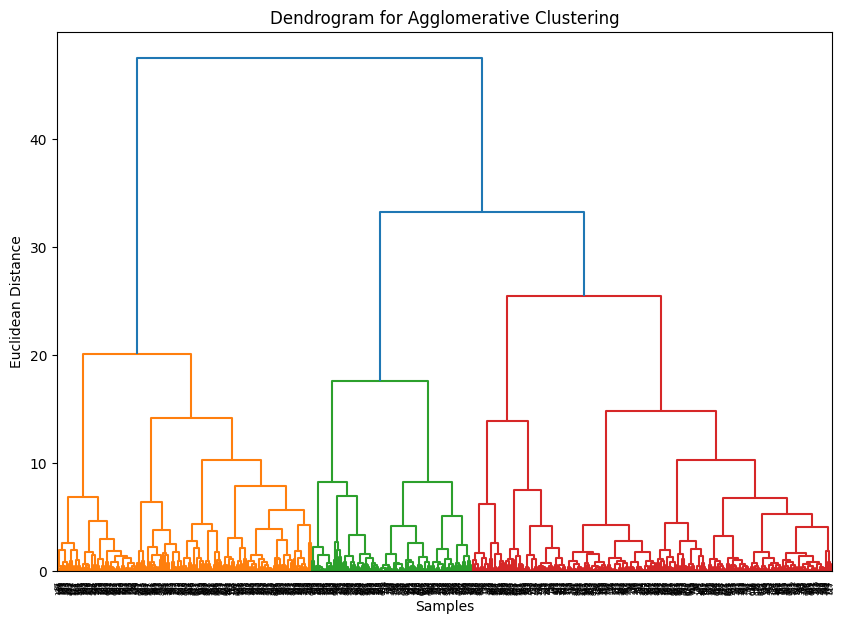

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model
agg_labels = agg_clust.fit_predict(scaled_data)

# Create the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()



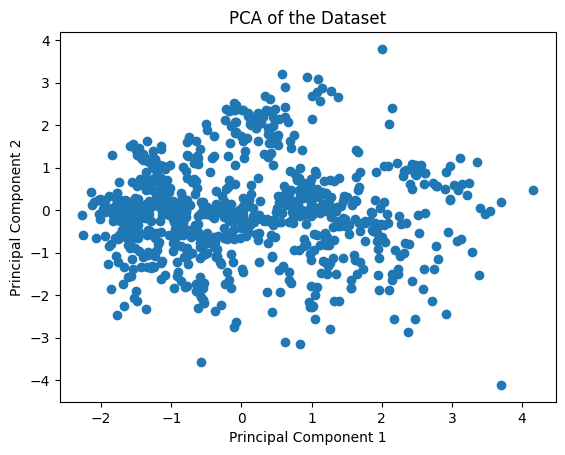

Explained Variance Ratio: [0.36753939 0.24409236]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd



# Select relevant numeric columns
numeric_data = df[['vcost', 'travel', 'gcost', 'income', 'size']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot the PCA result (if desired)
import matplotlib.pyplot as plt
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.show()

# Print explained variance ratio
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

KeyError: 'OTF5'

<Figure size 1500x800 with 0 Axes>